# The GENMOD Toolkit: What do you do when things aren't Normal?

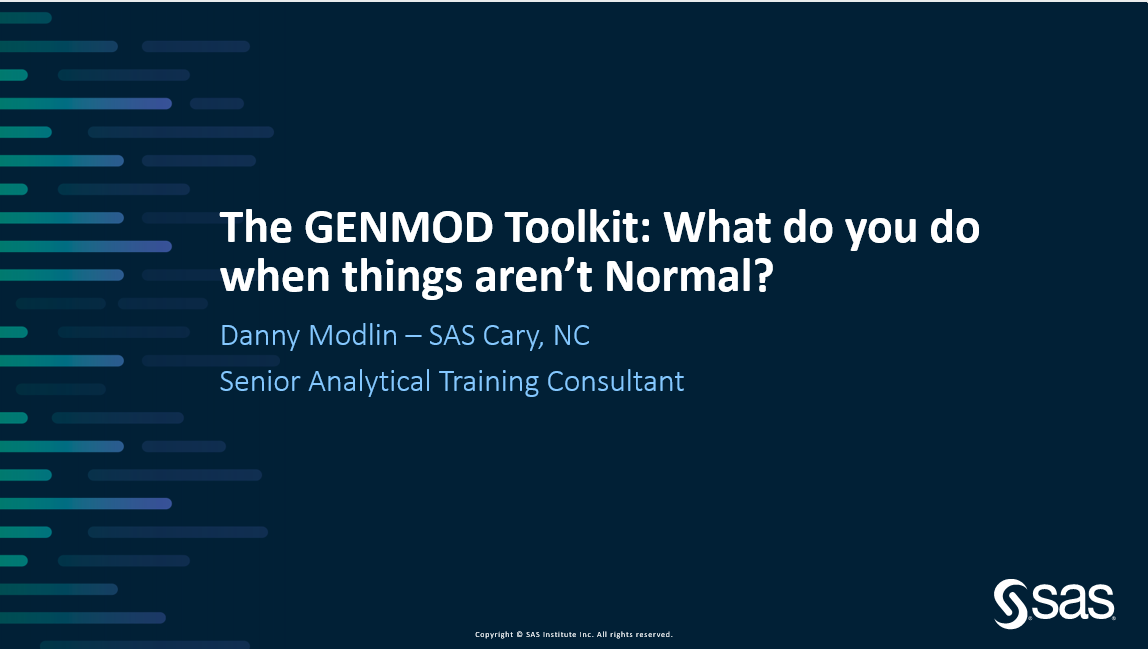

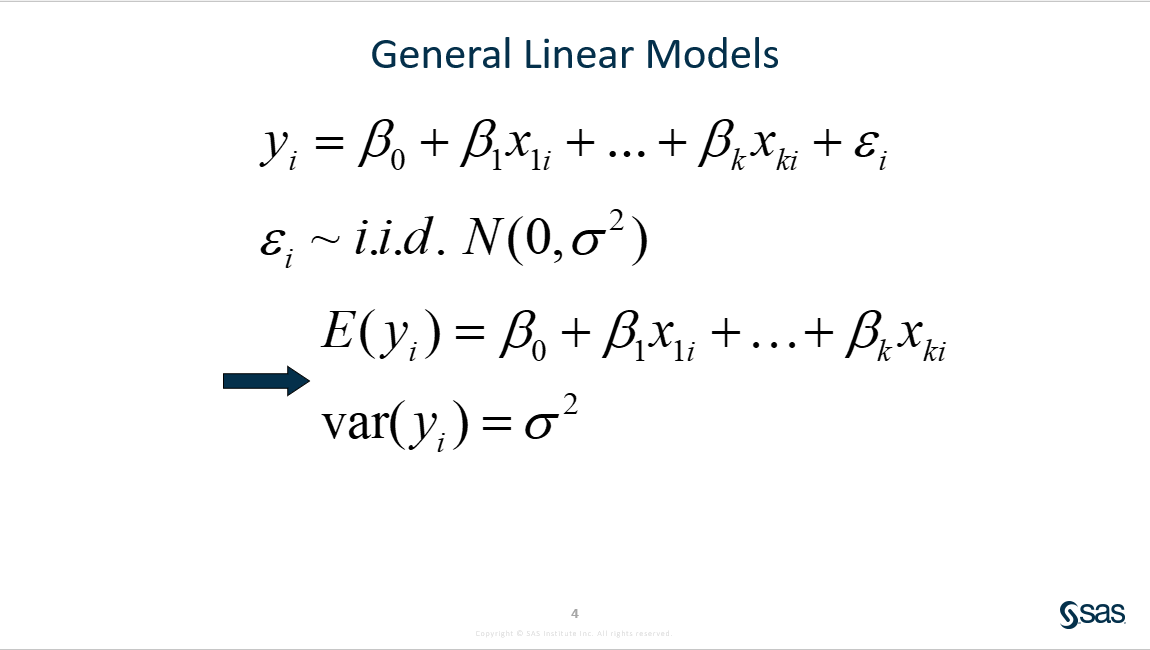

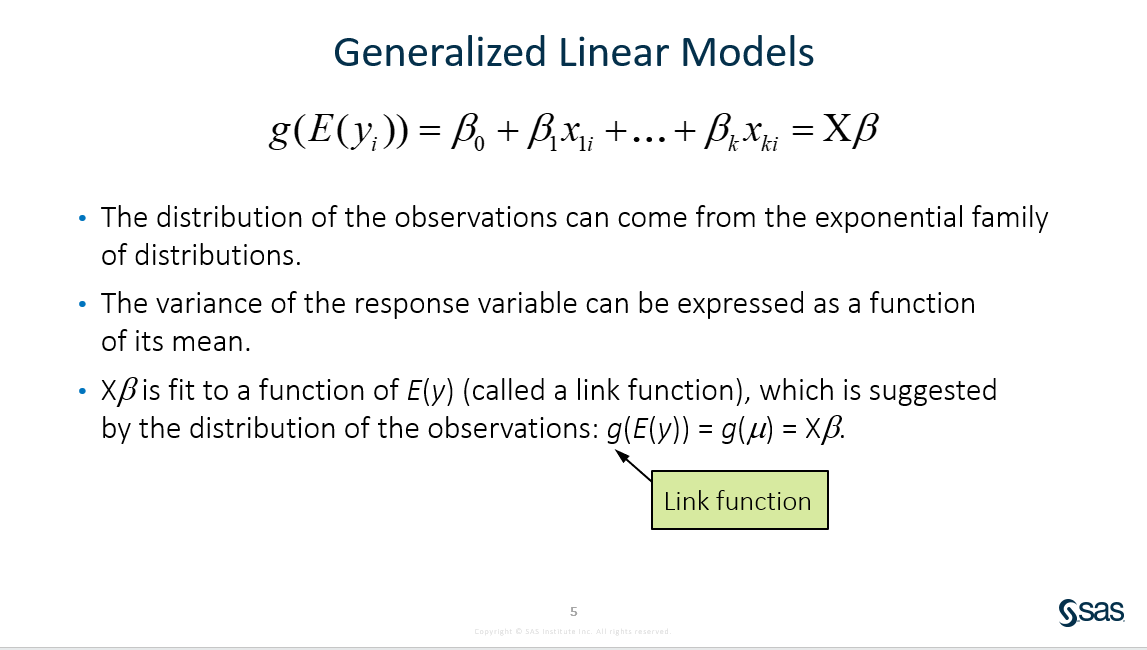

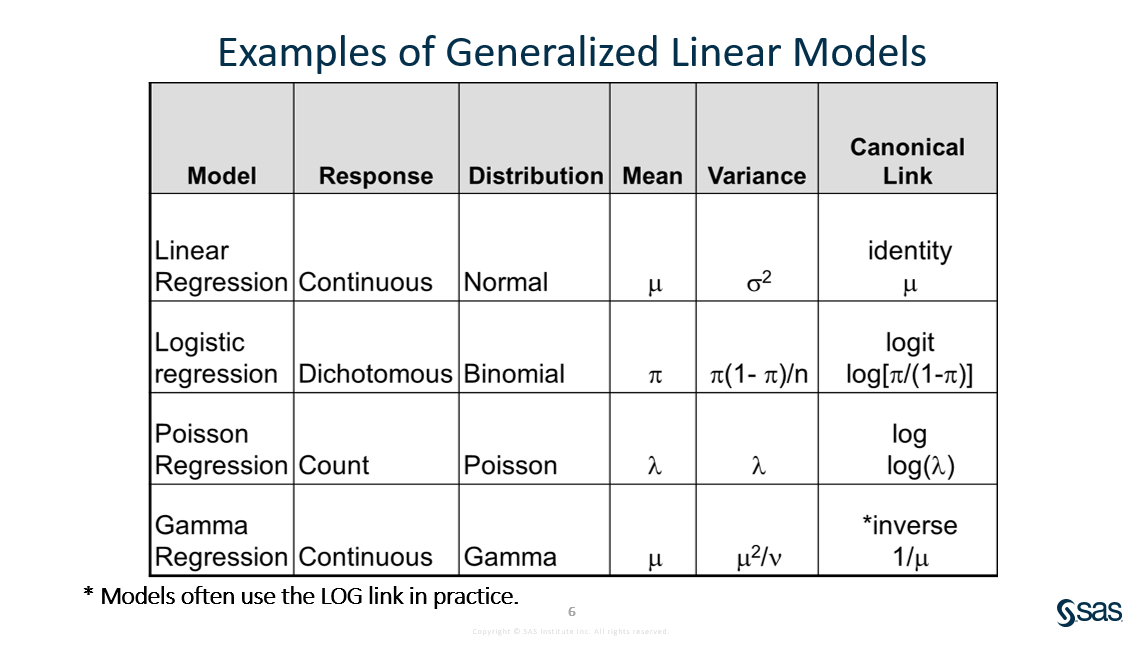

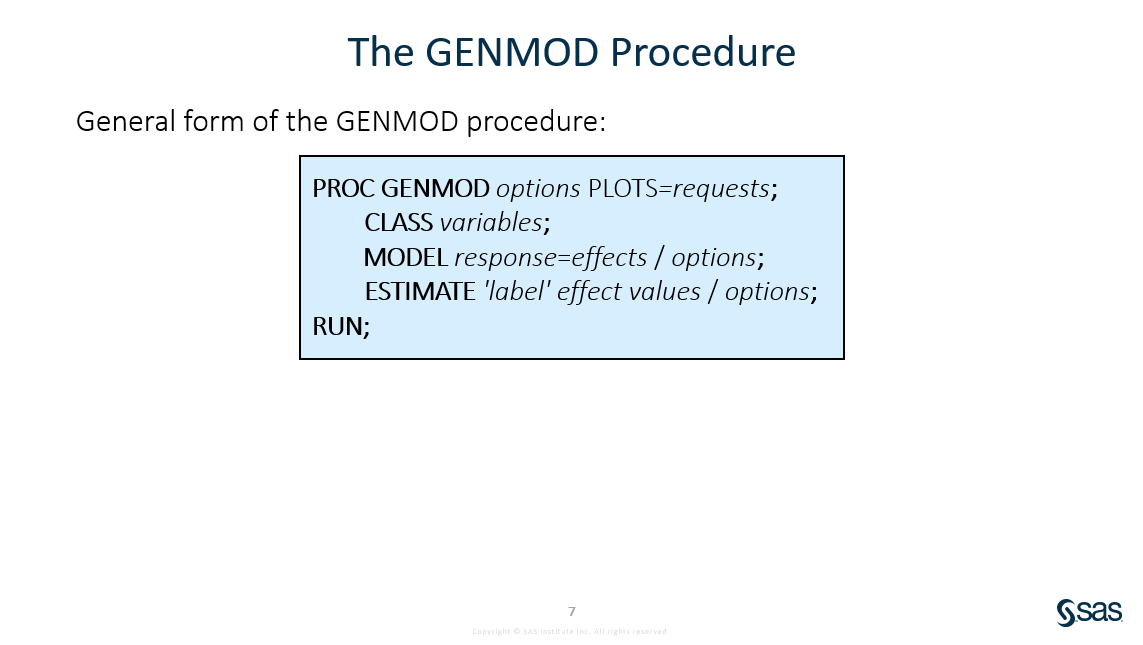

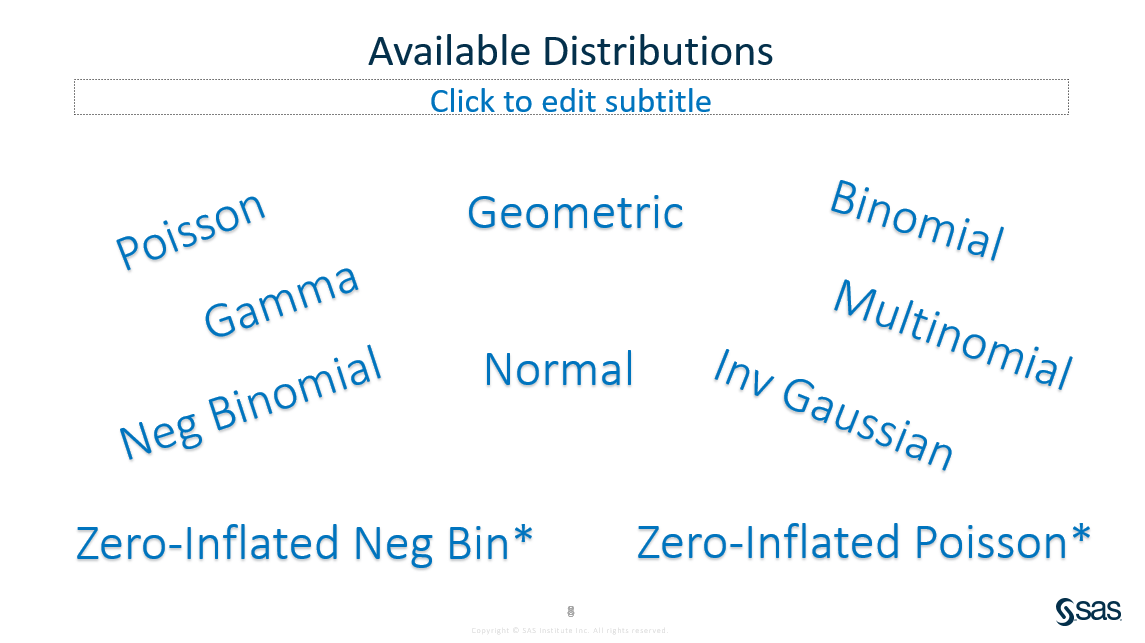

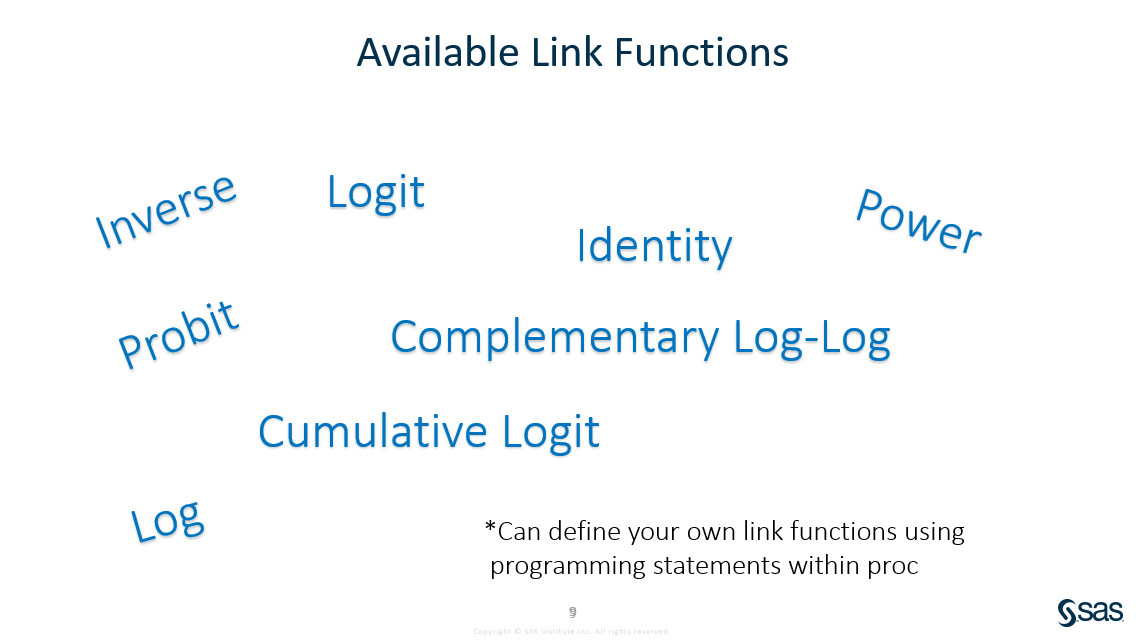

In [4]:
/*Patients in each of two centers are randomly assigned to groups receiving the active treatment or a placebo.
  During treatment, respiratory status, represented by the variable outcome (coded here as 0=poor, 1=good),
  is determined for each of four visits. The variables center, treatment, sex, and baseline (baseline respiratory status)
  are classification variables with two levels. The variable age (age at time of entry into the study) is a continuous variable.
*/

data resp;
   input center id treatment $ sex $ age baseline visit1-visit4;
   datalines;
1  1 P M 46 0 0 0 0 0
1  2 P M 28 0 0 0 0 0
1  3 A M 23 1 1 1 1 1
1  4 P M 44 1 1 1 1 0
1  5 P F 13 1 1 1 1 1
1  6 A M 34 0 0 0 0 0
1  7 P M 43 0 1 0 1 1
1  8 A M 28 0 0 0 0 0
1  9 A M 31 1 1 1 1 1
1 10 P M 37 1 0 1 1 0
1 11 A M 30 1 1 1 1 1
1 12 A M 14 0 1 1 1 0
1 13 P M 23 1 1 0 0 0
1 14 P M 30 0 0 0 0 0
1 15 P M 20 1 1 1 1 1
1 16 A M 22 0 0 0 0 1
1 17 P M 25 0 0 0 0 0
1 18 A F 47 0 0 1 1 1
1 19 P F 31 0 0 0 0 0
1 20 A M 20 1 1 0 1 0
1 21 A M 26 0 1 0 1 0
1 22 A M 46 1 1 1 1 1
1 23 A M 32 1 1 1 1 1
1 24 A M 48 0 1 0 0 0
1 25 P F 35 0 0 0 0 0
1 26 A M 26 0 0 0 0 0
1 27 P M 23 1 1 0 1 1
1 28 P F 36 0 1 1 0 0
1 29 P M 19 0 1 1 0 0
1 30 A M 28 0 0 0 0 0
1 31 P M 37 0 0 0 0 0
1 32 A M 23 0 1 1 1 1
1 33 A M 30 1 1 1 1 0
1 34 P M 15 0 0 1 1 0
1 35 A M 26 0 0 0 1 0
1 36 P F 45 0 0 0 0 0
1 37 A M 31 0 0 1 0 0
1 38 A M 50 0 0 0 0 0
1 39 P M 28 0 0 0 0 0
1 40 P M 26 0 0 0 0 0
1 41 P M 14 0 0 0 0 1
1 42 A M 31 0 0 1 0 0
1 43 P M 13 1 1 1 1 1
1 44 P M 27 0 0 0 0 0
1 45 P M 26 0 1 0 1 1
1 46 P M 49 0 0 0 0 0
1 47 P M 63 0 0 0 0 0
1 48 A M 57 1 1 1 1 1
1 49 P M 27 1 1 1 1 1
1 50 A M 22 0 0 1 1 1
1 51 A M 15 0 0 1 1 1
1 52 P M 43 0 0 0 1 0
1 53 A F 32 0 0 0 1 0
1 54 A M 11 1 1 1 1 0
1 55 P M 24 1 1 1 1 1
1 56 A M 25 0 1 1 0 1
2  1 P F 39 0 0 0 0 0
2  2 A M 25 0 0 1 1 1
2  3 A M 58 1 1 1 1 1
2  4 P F 51 1 1 0 1 1
2  5 P F 32 1 0 0 1 1
2  6 P M 45 1 1 0 0 0
2  7 P F 44 1 1 1 1 1
2  8 P F 48 0 0 0 0 0
2  9 A M 26 0 1 1 1 1
2 10 A M 14 0 1 1 1 1
2 11 P F 48 0 0 0 0 0
2 12 A M 13 1 1 1 1 1
2 13 P M 20 0 1 1 1 1
2 14 A M 37 1 1 0 0 1
2 15 A M 25 1 1 1 1 1
2 16 A M 20 0 0 0 0 0
2 17 P F 58 0 1 0 0 0
2 18 P M 38 1 1 0 0 0
2 19 A M 55 1 1 1 1 1
2 20 A M 24 1 1 1 1 1
2 21 P F 36 1 1 0 0 1
2 22 P M 36 0 1 1 1 1
2 23 A F 60 1 1 1 1 1
2 24 P M 15 1 0 0 1 1
2 25 A M 25 1 1 1 1 0
2 26 A M 35 1 1 1 1 1
2 27 A M 19 1 1 0 1 1
2 28 P F 31 1 1 1 1 1
2 29 A M 21 1 1 1 1 1
2 30 A F 37 0 1 1 1 1
2 31 P M 52 0 1 1 1 1
2 32 A M 55 0 0 1 1 0
2 33 P M 19 1 0 0 1 1
2 34 P M 20 1 0 1 1 1
2 35 P M 42 1 0 0 0 0
2 36 A M 41 1 1 1 1 1
2 37 A M 52 0 0 0 0 0
2 38 P F 47 0 1 1 0 1
2 39 P M 11 1 1 1 1 1
2 40 P M 14 0 0 0 1 0
2 41 P M 15 1 1 1 1 1
2 42 P M 66 1 1 1 1 1
2 43 A M 34 0 1 1 0 1
2 44 P M 43 0 0 0 0 0
2 45 P M 33 1 1 1 0 1
2 46 P M 48 1 1 0 0 0
2 47 A M 20 0 1 1 1 1
2 48 P F 39 1 0 1 0 0
2 49 A M 28 0 1 0 0 0
2 50 P F 38 0 0 0 0 0
2 51 A M 43 1 1 1 1 0
2 52 A F 39 0 1 1 1 1
2 53 A M 68 0 1 1 1 1
2 54 A F 63 1 1 1 1 1
2 55 A M 31 1 1 1 1 1
;

data resp;
   set resp;
   visit=1;  outcome=visit1;  output;
   visit=2;  outcome=visit2;  output;
   visit=3;  outcome=visit3;  output;
   visit=4;  outcome=visit4;  output;
run;

proc print data=resp (obs=20);
run;

proc genmod data=resp;
   class id treatment(ref="P") center(ref="1") sex(ref="M")
      baseline(ref="0");
   model outcome(event='1')=treatment center sex age baseline / dist=bin;
   repeated subject=id(center) / corr=unstr corrw;
run;

Obs,center,id,treatment,sex,age,baseline,visit1,visit2,visit3,visit4,visit,outcome
1,1,1,P,M,46,0,0,0,0,0,1,0
2,1,1,P,M,46,0,0,0,0,0,2,0
3,1,1,P,M,46,0,0,0,0,0,3,0
4,1,1,P,M,46,0,0,0,0,0,4,0
5,1,2,P,M,28,0,0,0,0,0,1,0
6,1,2,P,M,28,0,0,0,0,0,2,0
7,1,2,P,M,28,0,0,0,0,0,3,0
8,1,2,P,M,28,0,0,0,0,0,4,0
9,1,3,A,M,23,1,1,1,1,1,1,1
10,1,3,A,M,23,1,1,1,1,1,2,1


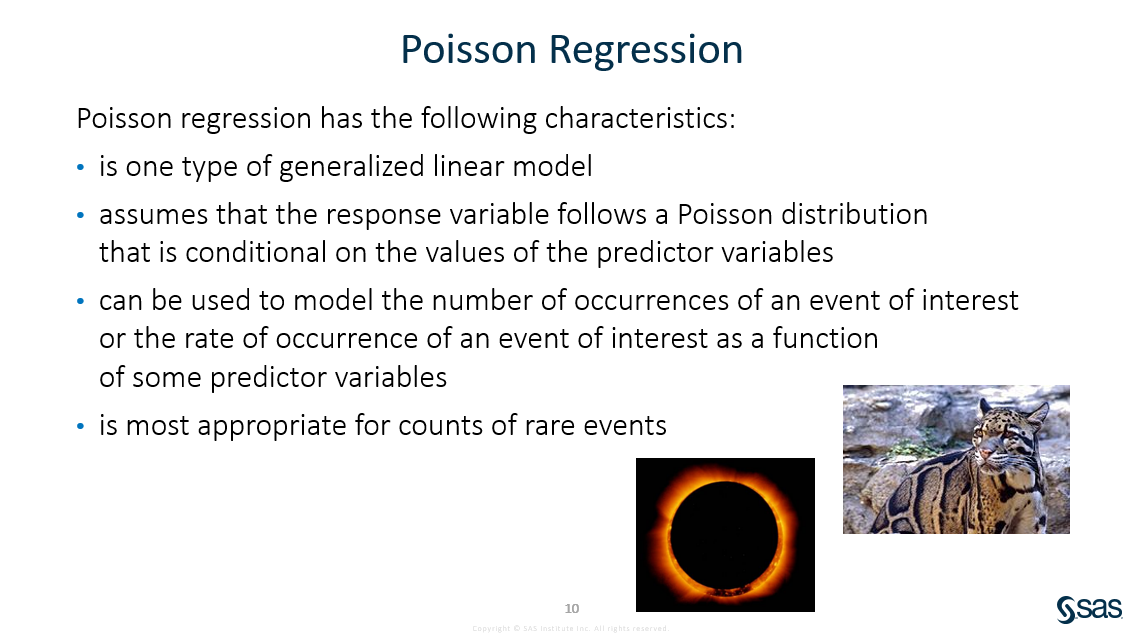

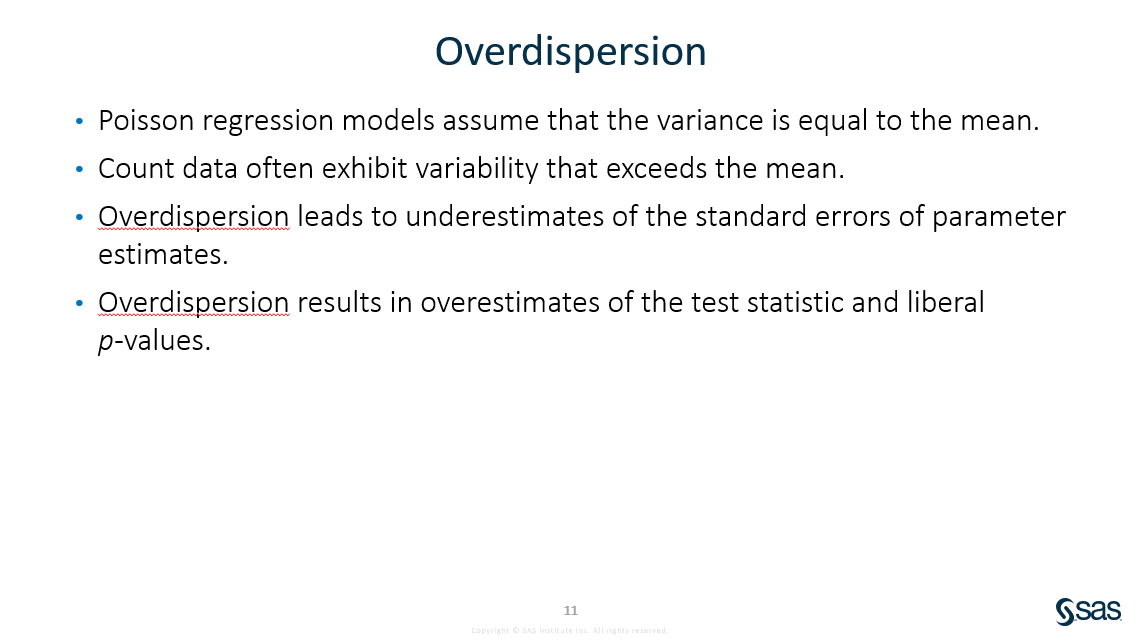

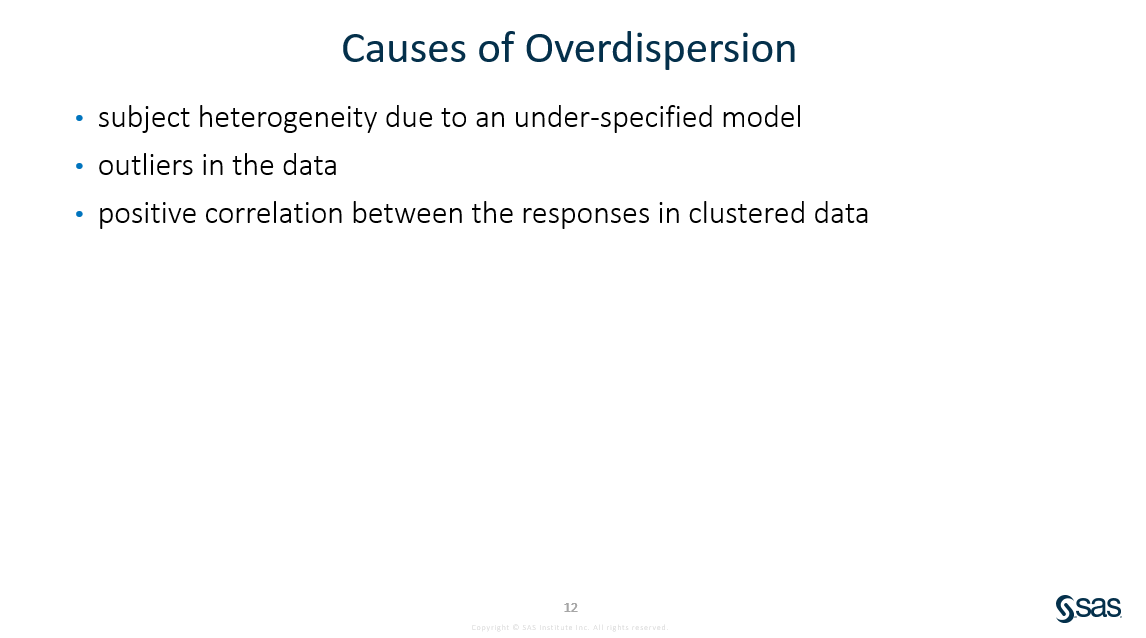

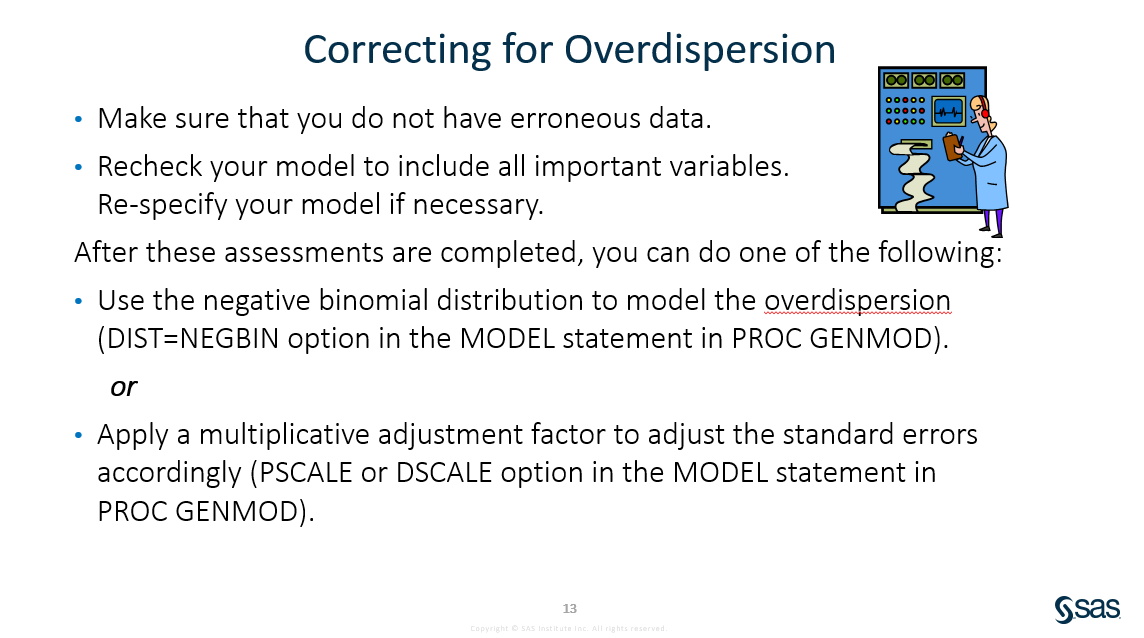

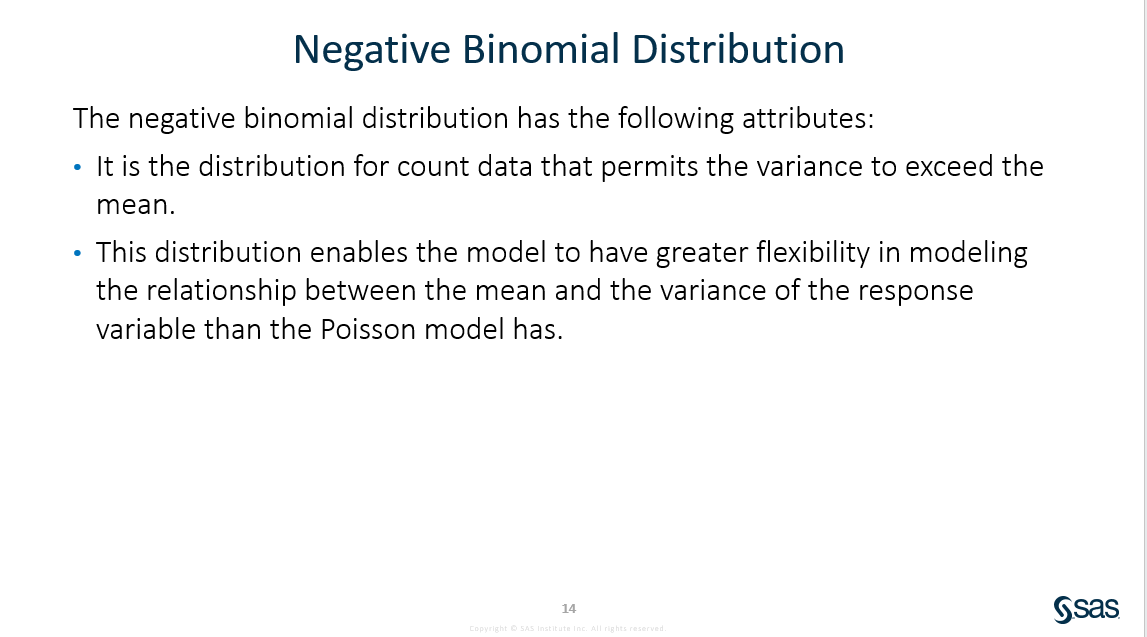

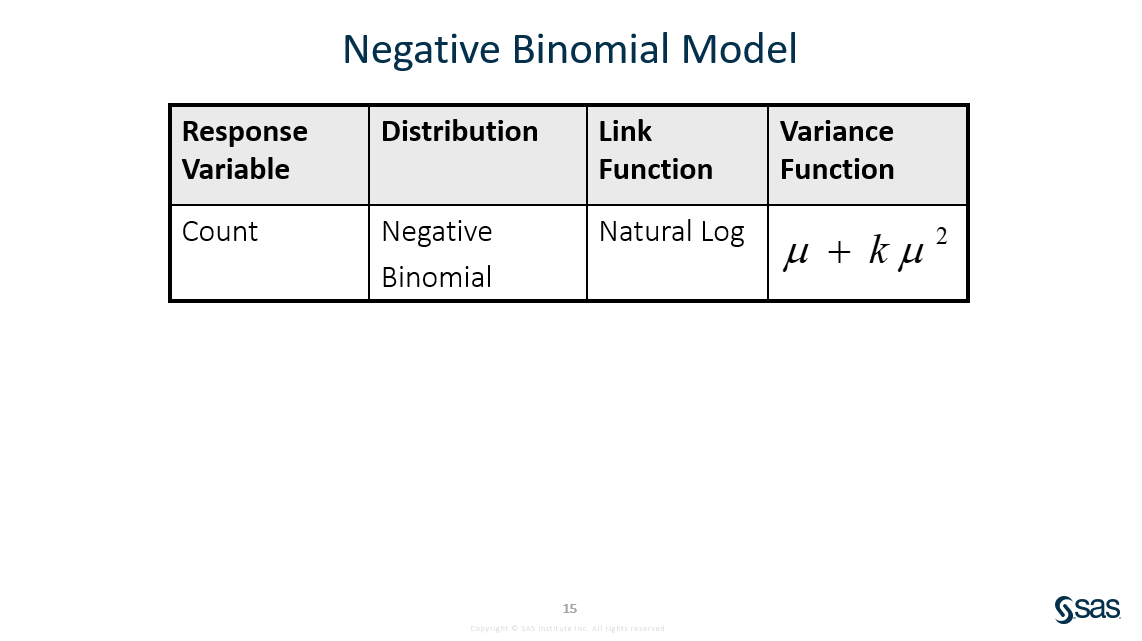

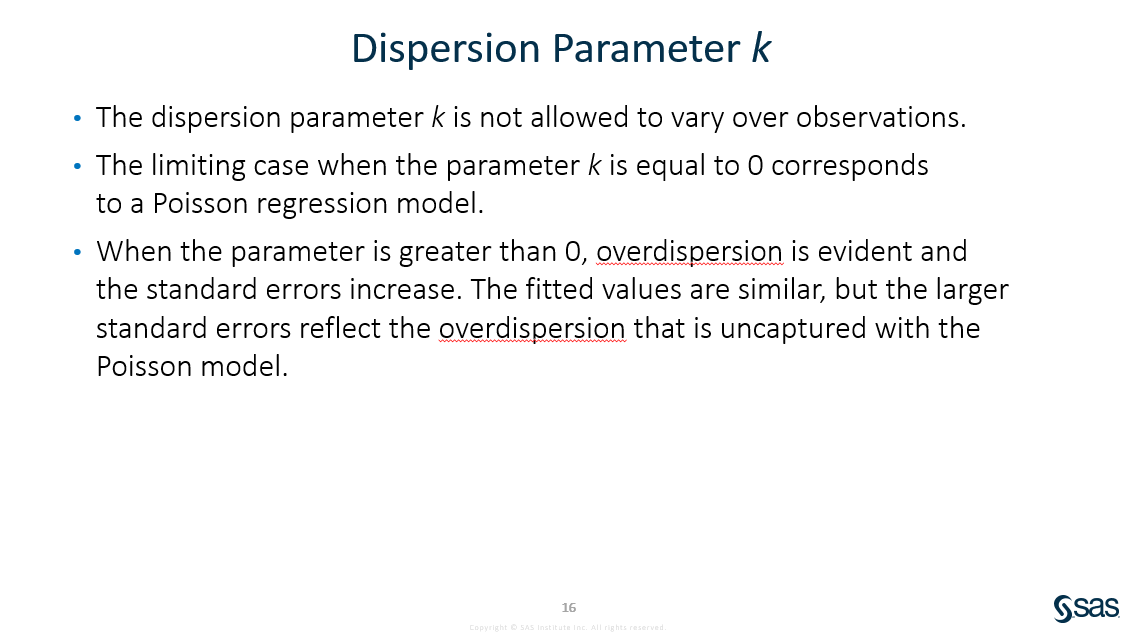

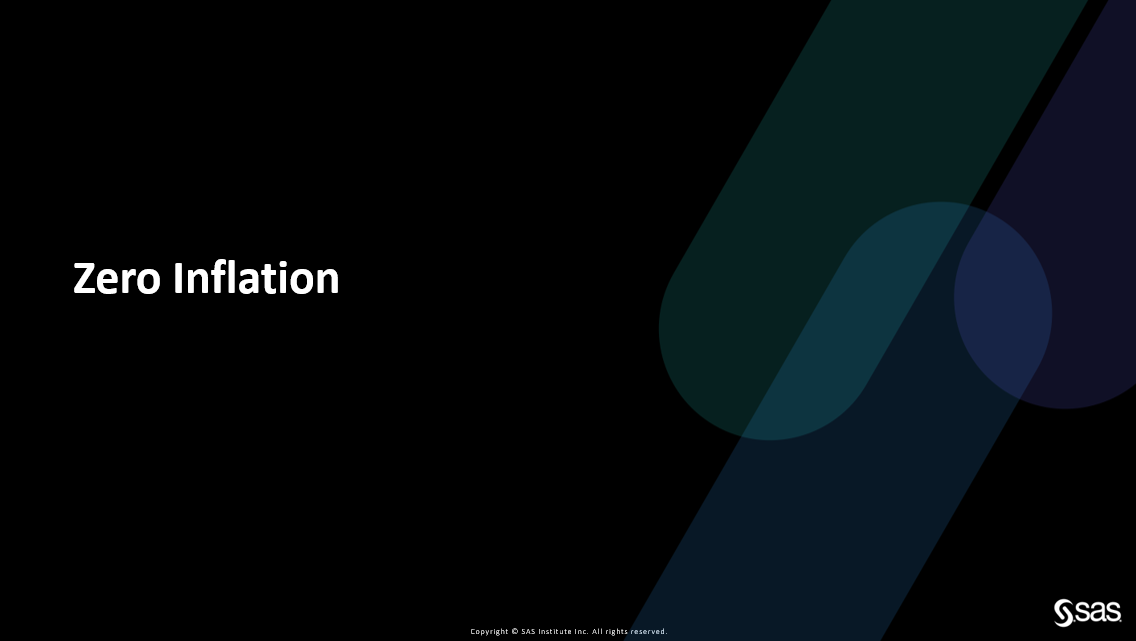

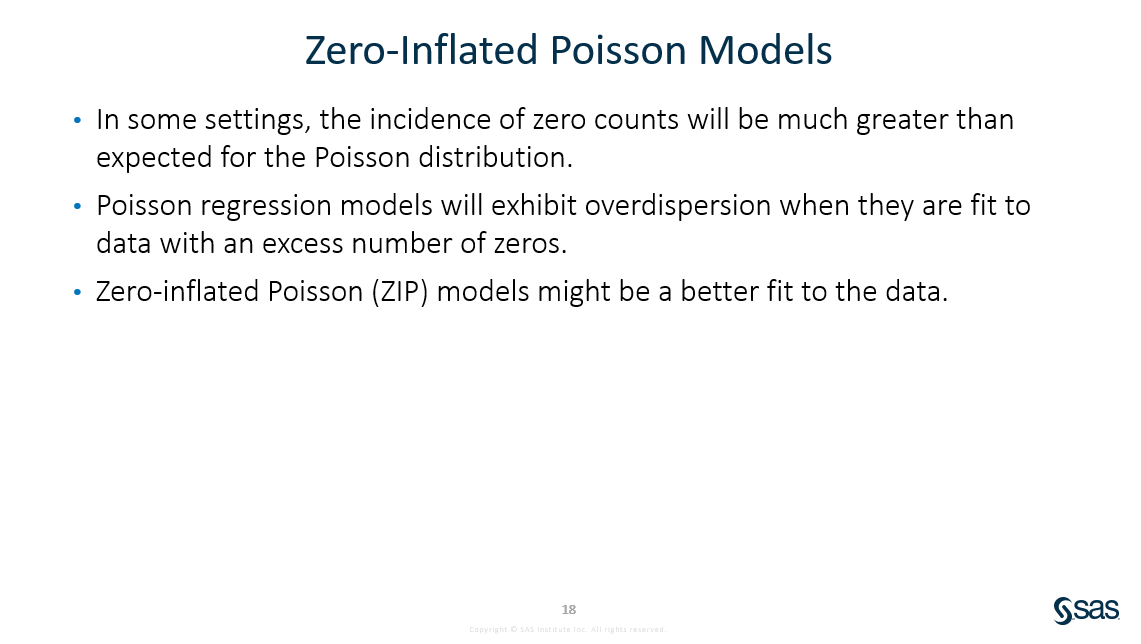

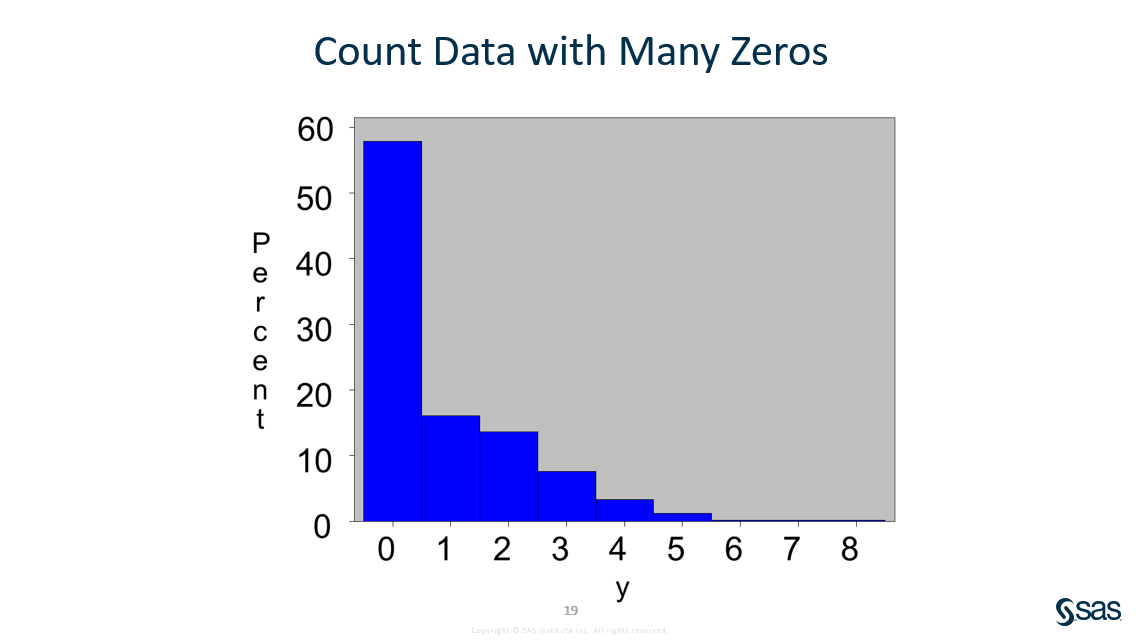

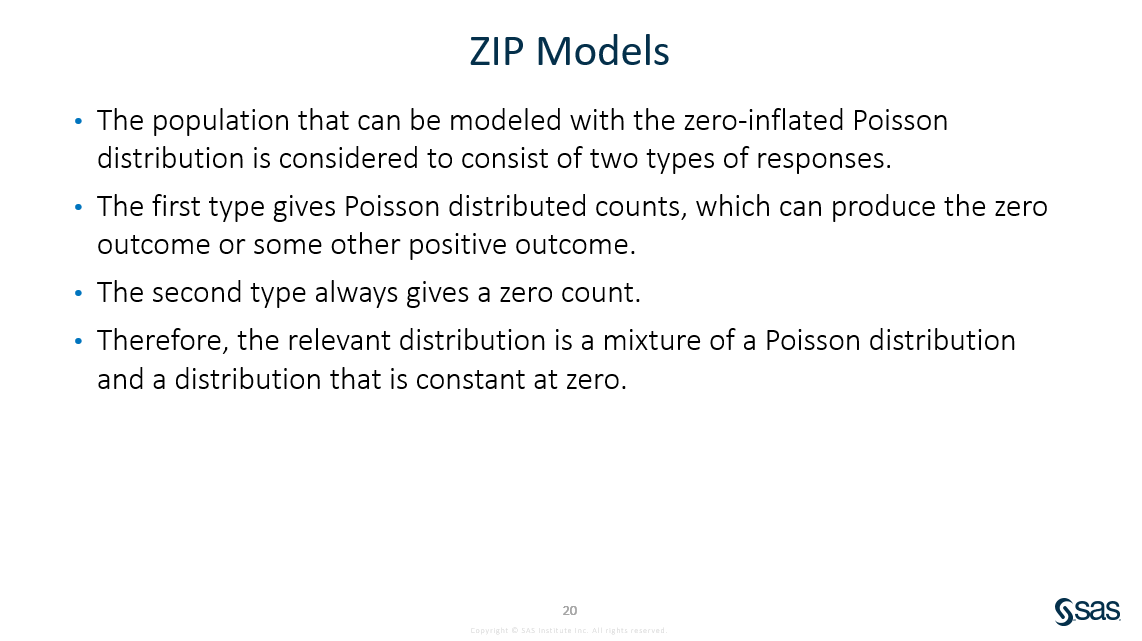

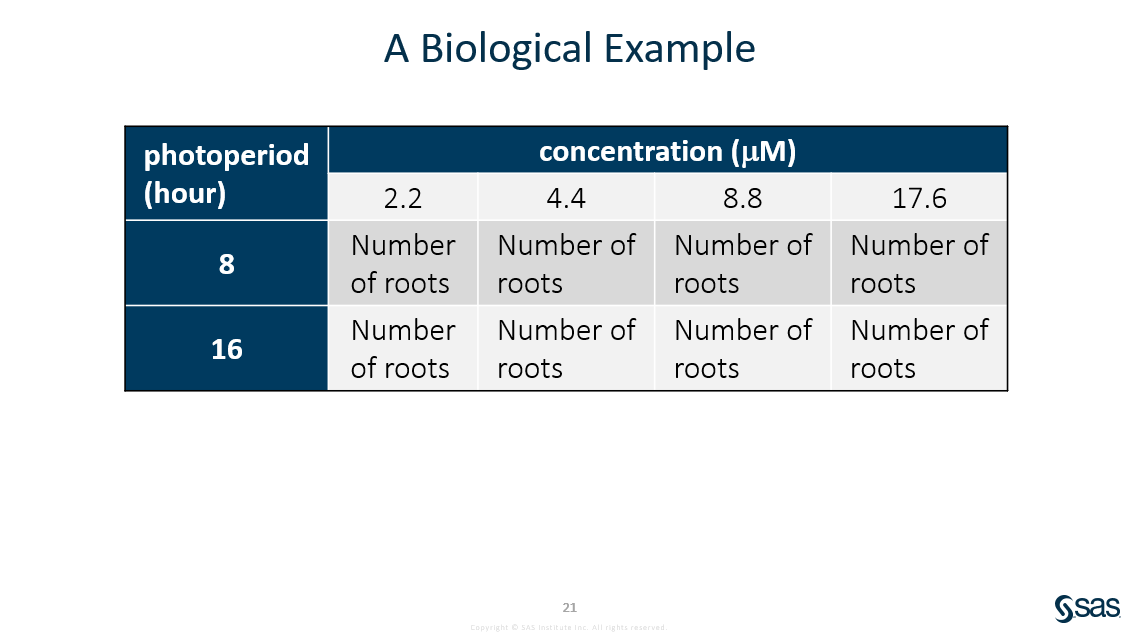

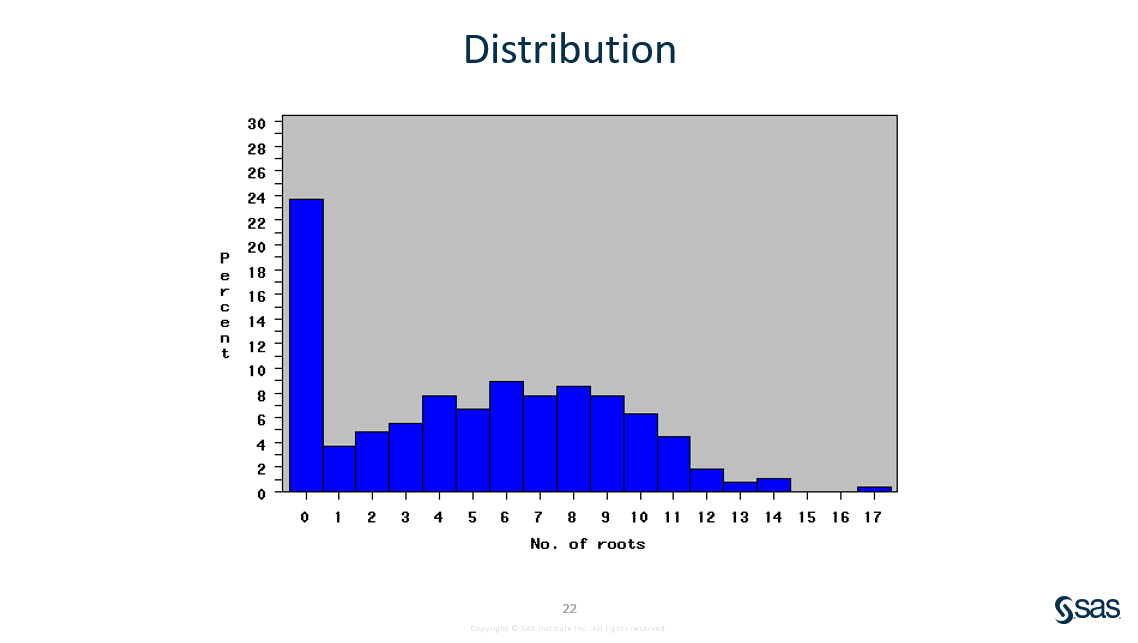

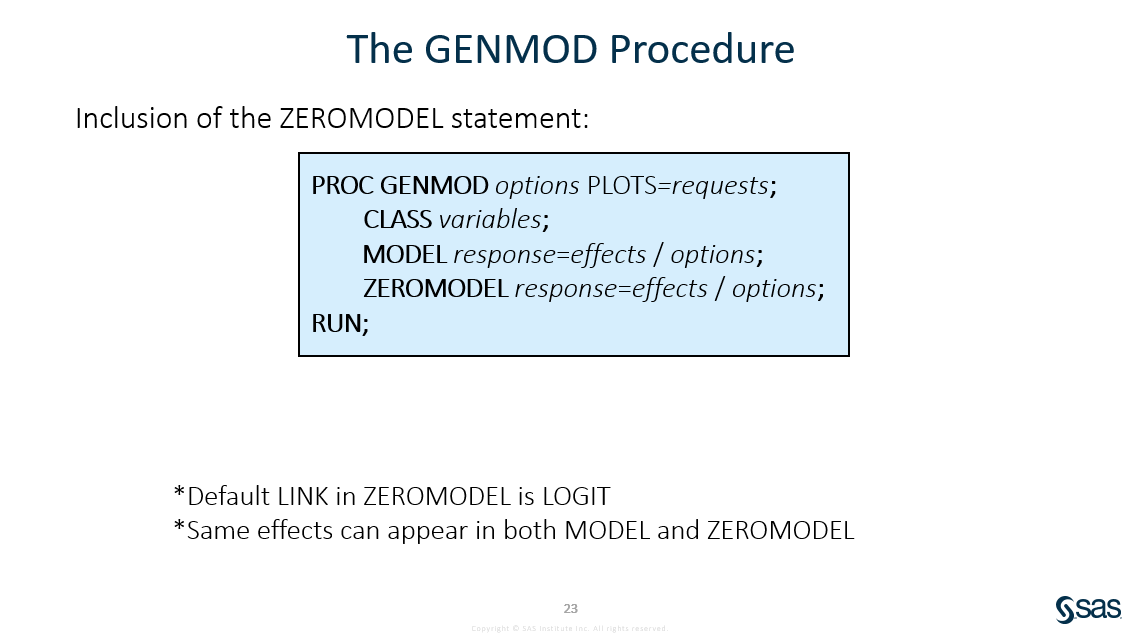


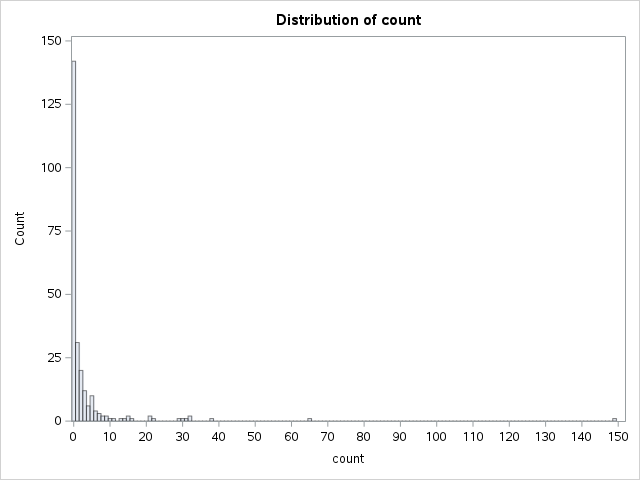

In [2]:
/*We have data on 250 groups that went to a park.
  Each group was questioned about how many fish they caught (count),
  how many children were in the group (child),
  how many people were in the group (persons),
  and whether or not they brought a camper to the park (camper).
*/

data WORK.FISH(label='Written by SAS  ');
  infile datalines dsd truncover;
  input nofish:32. livebait:32. camper:32. persons:32. child:32. xb:32. zg:32. count:32.;
datalines4;
1,0,0,1,0,-0.896314561,3.0504047871,0
0,1,1,1,0,-0.55834496,1.7461489439,0
0,1,0,1,0,-0.401731014,0.2799388766,0
0,1,1,2,1,-0.956298113,-0.601525664,0
0,1,0,1,0,0.4368909597,0.5277091265,1
0,1,1,4,2,1.3944854736,-0.70753479,0
0,1,0,3,1,0.1847167462,-3.398022175,0
0,1,0,4,3,2.3291065693,-5.450901508,0
1,0,1,3,2,0.188386485,-1.527417779,0
0,1,1,1,0,0.2876899242,1.3938905001,1
0,1,0,4,1,1.9909527302,-1.933189988,0
0,1,1,3,2,1.3178931475,-2.471574545,0
1,0,0,3,0,0.2980416715,1.5912652016,1
0,1,0,3,0,1.2908734083,0.8295348883,2
0,1,1,1,0,-0.06088984,2.8205792904,0
1,1,1,1,0,0.3700492084,2.1583449841,1
0,1,0,4,1,1.9790934324,-3.069952726,0
1,1,1,3,2,0.7153370976,-1.952804923,0
0,1,1,2,1,1.5160530806,-0.186567351,1
0,1,0,3,1,-0.034895968,-0.118922494,0
0,1,0,4,1,1.1782302856,0.0018565661,1
0,1,1,4,0,1.6421117783,1.892821312,5
0,1,1,2,1,0.5977273583,-0.294278145,0
0,1,1,2,0,1.1397230625,1.9317910671,3
0,1,1,3,0,3.5002975464,1.4512708187,30
0,1,1,2,0,-0.789978385,2.817448616,0
0,1,1,4,0,2.6623561382,1.6565625668,13
0,1,0,2,1,1.6061724424,-1.064542532,0
0,1,0,1,0,0.0185501799,0.0807982683,0
0,1,0,4,3,3.0345590115,-4.824044704,0
0,1,0,1,0,0.0510007553,0.9218238592,0
0,1,1,3,1,0.7452588081,-0.663867116,0
0,1,1,4,0,2.4531366825,3.5083677769,11
0,1,1,4,1,2.3527066708,0.1766097248,5
0,1,1,1,0,-1.108257532,0.7720884085,0
1,0,0,2,0,0.5154194236,1.6566575766,1
1,1,1,2,1,1.9827685356,-0.642237127,1
1,1,1,4,1,2.0668559074,1.244507432,7
1,1,1,3,1,0.0950117707,-2.268660784,0
0,1,1,4,1,5.3526740074,-1.472992539,14
0,1,1,1,0,-0.711813927,3.0204780102,0
0,1,1,4,0,3.4840462208,2.3556528091,32
1,0,0,3,2,2.4009063244,-3.086473703,0
1,0,1,4,0,0.3760284781,2.6760778427,1
1,1,0,4,2,1.0850564241,-2.654790401,0
0,1,1,1,0,-1.067198753,2.1330449581,0
0,1,1,2,1,0.3229970634,0.3034364879,0
0,1,0,1,0,0.5010663271,1.5531616211,1
0,1,1,2,1,2.0114884377,0.6270364523,5
0,1,0,2,1,0.9571473598,-2.05817461,0
0,1,1,2,1,1.1144340038,0.2847320735,1
0,1,1,2,1,-0.673830032,-0.708101988,0
0,1,1,4,0,3.1967058182,1.5154833794,22
1,0,0,2,0,-0.3863208,2.0795879364,0
0,1,1,3,0,2.7185115814,2.6293129921,15
1,0,1,1,0,-1.269290566,4.179599762,0
0,1,1,1,0,-1.087805986,2.1226129532,0
0,1,1,1,0,-0.984578311,1.351520896,0
1,1,1,4,1,1.8724677563,1.2611768246,5
1,1,1,1,0,1.547955513,1.6289883852,4
0,1,0,2,0,1.004094243,1.0836246014,2
0,1,1,2,1,-0.165202618,2.0952503681,0
0,1,0,2,1,1.471645236,-0.073470898,2
0,1,1,4,0,3.4893360138,2.5479974747,32
0,1,0,4,3,1.8857758045,-4.232519627,0
0,1,1,1,0,-2.272530079,1.6007531881,0
0,1,0,1,0,0.6138409972,1.1117559671,1
1,1,0,3,2,2.8789975643,-2.766067028,0
1,1,1,1,0,-0.944848835,2.0116078854,0
0,1,1,2,1,0.8200352192,-1.285437942,0
0,1,1,3,0,2.0881836414,2.2687482834,7
0,1,0,4,3,2.1653063297,-5.035178185,0
1,0,0,4,2,0.55752635,-2.696651697,0
0,1,1,3,2,-0.627695501,-3.22431159,0
1,0,1,1,0,-3.275050163,0.9133918285,0
0,1,0,2,0,0.3073975742,-0.431482762,0
0,1,0,3,2,0.4593037367,-3.140106678,0
1,1,1,1,0,-0.188099161,3.2674453259,0
0,1,0,2,1,-0.19742322,-0.238331914,0
0,1,0,4,0,0.9011332393,1.3939222097,2
0,1,1,4,1,2.2297375202,-0.410112113,3
1,1,0,2,1,1.1500788927,-0.320476443,1
0,1,1,3,0,1.7165309191,2.6540598869,5
0,1,0,1,0,-0.465738386,0.2460825294,0
0,1,1,1,0,1.0195733309,1.7188441753,2
1,0,0,3,1,1.8674137592,-0.54847914,1
1,0,0,4,1,0.7143785357,-2.550681114,0
1,1,1,1,0,0.0440081209,2.2629549503,1
0,1,1,4,0,5.0050396919,3.5721342564,149
0,1,1,3,2,2.4615564346,-2.769872427,0
0,1,1,3,1,1.5704168081,-0.390616268,1
0,1,0,2,0,-1.490852475,0.0889994577,0
0,1,1,3,0,-0.865133345,0.9720797539,0
0,1,0,2,1,0.8338031769,0.0233576857,1
0,1,0,4,2,2.2084999084,-1.734373331,0
0,1,1,3,1,1.6332079172,-1.501252651,0
0,1,0,4,2,1.5240097046,-4.324279785,0
1,0,0,4,0,2.4913747311,-0.722057521,2
0,1,1,2,0,1.0847690105,2.9630026817,2
0,1,0,4,0,3.5946772099,0.860208869,29
0,1,1,1,0,1.1288346052,2.0607004166,3
1,0,1,2,0,-0.385939926,2.2662763596,0
0,1,0,4,2,2.2135095596,-2.06809473,0
1,0,0,3,0,2.5187780857,-0.110921405,5
0,1,1,2,0,0.0115894843,-0.33921802,0
0,1,0,4,1,3.2988061905,-2.671430111,0
0,1,1,1,0,-0.258302957,0.7147980928,0
0,1,0,3,1,0.931161046,-1.925231814,0
0,1,1,4,1,3.2343406677,-1.934120536,0
0,1,1,4,1,0.5665621161,1.3611514568,1
0,1,1,1,0,1.9740951061,3.1780841351,7
0,1,1,2,0,0.1099227741,2.1244986057,1
0,1,0,1,0,-1.052196026,-1.837709427,0
1,0,0,4,1,1.1932103634,0.7328076363,2
0,1,0,3,2,0.3515802324,-2.184268236,0
1,1,0,2,0,1.1800631285,1.2939589024,2
0,1,0,2,1,0.4423512518,-0.252750695,0
0,1,0,4,1,0.3395077288,-0.768189728,0
1,0,1,3,1,0.368057549,-0.848371208,0
1,1,1,3,2,2.4312150478,-0.945337653,1
0,1,0,2,1,-0.267399877,-1.620429158,0
1,1,0,1,0,-0.36659652,2.514541626,0
1,0,1,4,3,1.4816583395,-2.82096076,0
0,1,0,1,0,-0.620765746,0.5831140876,0
1,0,1,4,3,1.5936685801,-2.947399616,0
0,1,0,4,1,2.8242943287,-0.742032945,3
0,1,1,1,0,1.4875385761,2.2652254105,4
0,1,1,3,0,1.1390730143,3.4486987591,3
0,1,0,2,0,1.4158217907,1.2972024679,3
0,1,1,4,0,2.1720778942,4.2631850243,8
1,0,1,3,0,0.8180824518,3.0585968494,2
1,1,1,1,0,0.3325906694,2.0458590984,1
0,1,0,4,0,1.8568427563,2.5167958736,6
1,1,1,4,2,0.5936886668,-1.977207899,0
0,1,1,2,1,0.0617640056,1.2698074579,0
1,1,0,4,0,1.9847823381,0.8246141672,5
0,1,1,4,1,1.9638563395,0.0315203704,3
0,1,0,3,1,3.7260725498,0.7016750574,31
0,1,1,2,1,0.3493249118,-0.161479443,0
0,1,0,2,0,0.7040555477,2.3449170589,2
1,1,1,4,3,1.5692437887,-4.469278812,0
0,1,1,2,1,0.781064868,-1.890136719,0
1,0,0,3,0,0.139555037,0.3391566873,0
0,1,1,3,1,1.5416204929,-1.531070232,0
1,1,0,1,0,0.0718735531,1.3057957888,0
0,1,0,2,0,0.7465148568,-0.650594831,0
1,1,1,4,0,1.9250824451,3.5670778751,6
0,1,0,3,0,2.2142121792,2.6915719509,9
1,0,1,3,2,-0.599701524,-2.059751987,0
1,0,1,2,1,-2.107331038,0.1413461715,0
0,1,1,1,0,-2.490455389,2.0737595558,0
0,1,1,2,1,-0.070476264,-0.478490353,0
0,1,0,1,0,-0.233503744,0.1525063664,0
0,1,0,2,0,2.1488587856,-0.488574415,2
0,1,0,3,0,3.1737546921,0.378390342,15
0,1,1,1,0,0.6767058372,1.6237850189,1
1,1,1,2,0,0.9033687115,2.0153822899,2
0,1,1,3,1,2.1214718819,-0.091606267,3
1,1,1,1,0,-1.680656552,2.2772350311,0
0,1,1,4,0,4.2684879303,1.3622959852,65
0,1,1,3,0,1.7596712112,1.4781696796,5
0,1,0,1,0,0.0071598762,0.1845640987,0
1,1,1,3,2,3.5338106155,-3.252695322,0
0,1,0,4,1,1.902828455,-1.590401888,0
0,1,0,4,2,2.0543143749,-3.139189243,0
1,1,0,1,0,0.1320486069,2.2440671921,1
0,1,1,4,1,2.8445887566,-0.078207836,8
0,1,1,3,0,-0.150227517,2.4962151051,0
0,1,1,3,2,0.3775939643,-2.29437232,0
0,1,1,4,3,1.461001873,-3.943372011,0
0,1,1,3,0,0.9519529343,2.6063089371,2
0,1,1,2,1,1.531072855,1.537260294,4
1,1,0,4,0,1.7160952091,1.8269017935,5
0,1,0,2,0,2.2420418262,2.3986170292,9
0,1,0,4,2,3.3890376091,-2.893302679,0
0,1,0,2,0,-0.457464665,3.17933321,0
0,1,1,2,0,-0.263669461,1.7608680725,0
0,1,0,1,0,-0.71243757,1.1771656275,0
1,1,1,2,0,3.0539169312,2.4691078663,21
0,1,0,1,0,-2.708276749,0.3473309875,0
0,1,1,3,0,1.8720514774,2.3079695702,6
0,1,0,2,1,0.1697490066,-0.835122049,0
1,0,1,2,0,-0.348856091,2.94145751,0
0,1,1,2,1,0.2402192205,-0.403173774,0
1,1,0,3,1,2.4038770199,-1.568528771,0
0,1,1,4,1,2.9885745049,0.9501032233,16
1,0,0,3,2,0.005257762,-3.463099957,0
0,1,1,3,2,0.4007853568,-1.719052434,0
1,1,1,4,0,1.5923120975,3.4721469879,4
0,1,1,2,1,1.022531271,0.5986690521,2
0,1,1,3,0,2.3773417473,2.5786168575,10
1,0,1,1,0,-2.112927198,1.6301124096,0
0,1,1,1,0,-0.557507157,1.9381258488,0
1,0,0,1,0,-1.276221037,0.145860225,0
1,0,1,2,0,1.0607860088,2.9731755257,2
1,1,1,2,0,0.4099714458,1.287543416,1
0,1,0,1,0,1.4727476835,1.0017284155,3
0,1,1,3,1,1.1222449541,-1.014991045,0
0,1,1,4,2,2.2423763275,-2.386286736,0
0,1,1,2,0,3.1638433933,1.2968349457,21
0,1,0,2,1,-0.585306764,-2.07876277,0
0,1,0,2,0,-0.015607119,2.2990167141,0
1,0,1,1,0,0.8344883323,2.2055110931,2
1,0,1,2,1,-1.268876076,1.5709195137,0
0,1,1,4,1,2.7570819855,-0.866619527,3
0,1,1,3,1,1.703949213,-1.154581547,0
0,1,1,4,0,3.7650024891,1.1892702579,38
1,1,1,4,3,2.7190511227,-4.614192963,0
0,1,1,1,0,-0.154021844,2.4653201103,0
0,1,0,1,0,-0.411525637,0.257135123,0
0,1,1,1,0,0.5311220288,2.9289655685,1
0,1,0,1,0,1.3403061628,3.5663721561,3
0,1,1,1,0,-1.562050104,1.4067739248,0
0,1,0,2,0,0.2253839523,2.2209911346,1
1,1,0,4,2,4.5026636124,-4.730084896,0
1,0,0,2,1,0.1621997654,-1.125854254,0
0,1,0,4,2,3.0470135212,-3.184262991,0
0,1,0,3,1,1.6307533979,-2.707653284,0
0,1,1,4,2,1.9832550287,0.5738066435,5
0,1,0,4,2,3.8771114349,-2.179812431,0
1,0,0,4,1,1.5847555399,-1.289599061,0
0,1,0,3,0,1.7011432648,0.0051179253,2
1,1,1,2,1,-0.170604989,1.469863534,0
0,1,1,1,0,-0.49698019,0.957906127,0
0,1,0,2,1,1.2182699442,-0.664241612,0
0,1,1,2,0,0.0375366136,2.8617730141,1
1,1,1,3,1,1.5232441425,3.0395727158,4
1,1,0,1,0,-0.907698154,0.6114888191,0
0,1,1,3,2,2.3313765526,-2.355525732,0
0,1,1,2,1,1.0680860281,1.375056386,2
0,1,1,1,0,1.4012657404,2.1410496235,3
1,1,0,4,2,3.9304218292,-2.74390316,0
0,1,0,3,1,0.1962469816,-1.781073928,0
0,1,0,2,0,0.0295273811,1.002204299,0
1,0,0,2,0,-0.766901433,-0.44208771,0
0,1,1,1,0,0.6611886621,3.2413334846,1
0,1,1,2,0,1.0150740147,0.9489593506,2
0,1,1,1,0,-1.046668053,0.7609766126,0
0,1,1,3,0,1.9380548,2.1590342522,6
0,1,1,2,0,1.7247505188,0.927846849,4
0,1,1,2,0,0.602655232,3.5716090202,1
0,1,1,4,2,2.4137816429,-1.316399097,1
1,0,0,2,0,-1.20076859,1.0577998161,0
0,1,1,3,1,1.9638493061,-0.733001232,1
0,1,0,3,0,-0.291065693,1.3155082464,0
1,1,1,2,0,-0.755235732,2.3242087364,0
0,1,1,4,3,1.7948591709,-5.625943661,0
0,1,1,2,1,-0.392648846,0.6772754192,0
1,1,1,3,2,1.374640584,-2.595630169,0
1,1,1,2,1,0.8288341165,-1.457115412,0
;;;;
run;quit;

proc means data = fish mean std min max var;
  var count child persons;
run;

proc univariate data = fish noprint;
  histogram count / midpoints = 0 to 50 by 1 vscale = count ;
run;

proc freq data = fish;
  tables camper;
run;

proc genmod data = fish;
  class camper;
  model count = child camper /dist=zip;
  zeromodel persons /link = logit;
run;

proc genmod data = fish;
  class camper;
  model count = child camper /dist=zip;
  zeromodel persons /link = logit ;
  estimate "camper = 0" intercept 1 child .684 camper 1 0 @ZERO intercept 1 persons 2.528; 
  estimate "camper = 1" intercept 1 child .684 camper 0 1 @ZERO intercept 1 persons 2.528; 
run;



In [3]:
proc genmod data = fish;
  class camper;
  model count = child camper /dist=nb;
run;

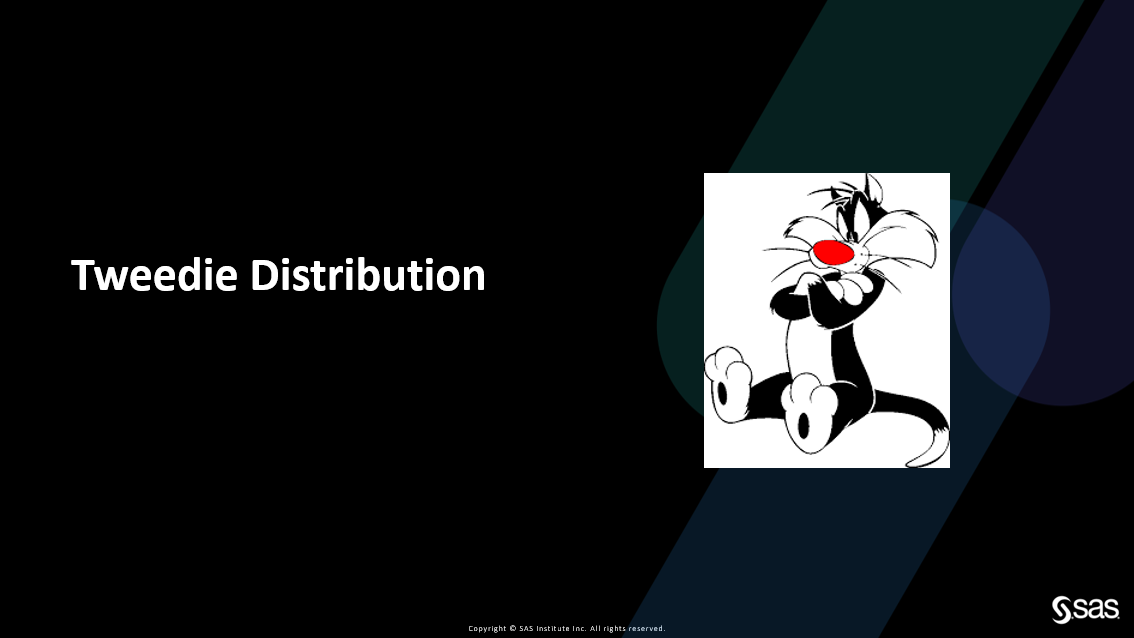

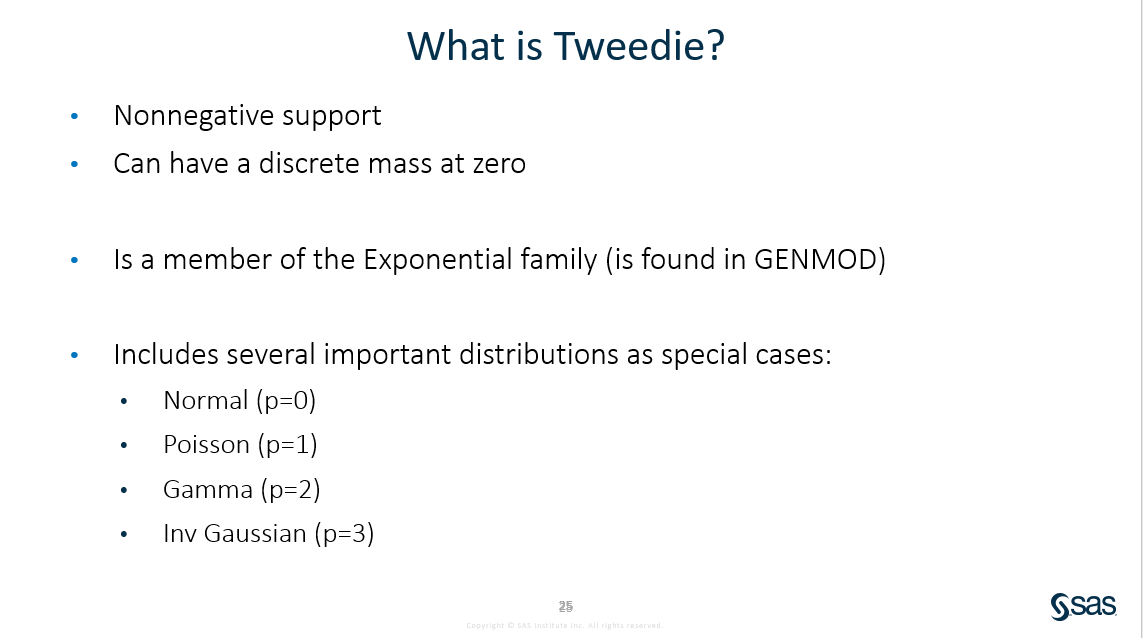

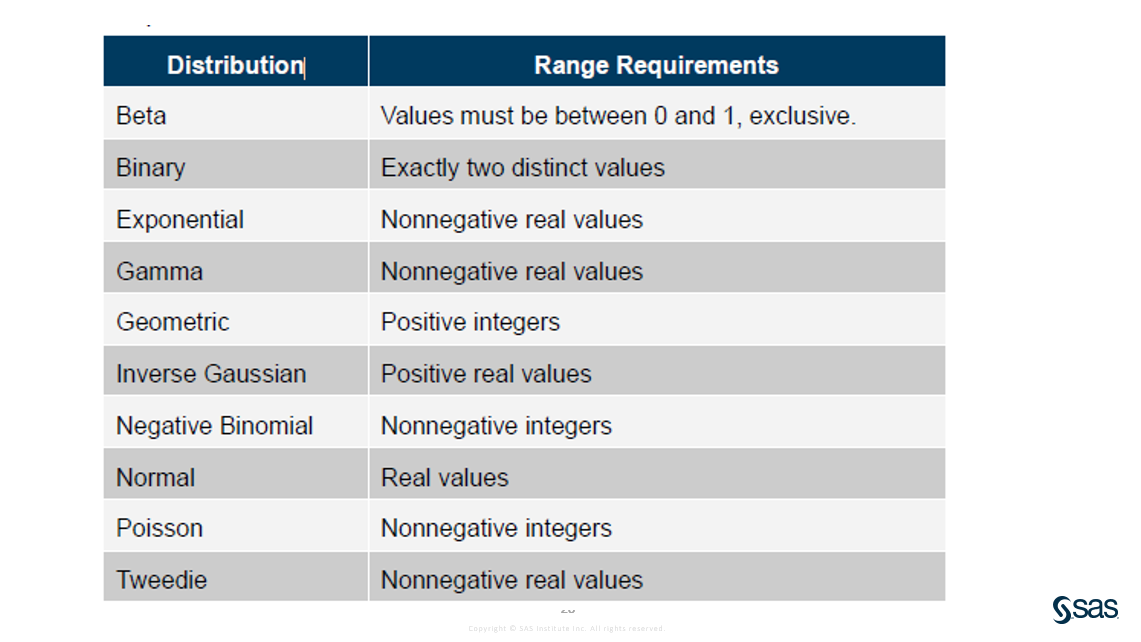

In [1]:
ods listing;

%let nObs = 250;
%let nClass = 5;
%let nLevs = 4;
%let seed = 100;

data tmp1;
   array c{&nClass};

   keep c1-c&nClass yTweedie d1 d2;

   /* Tweedie parms */
   phi=0.5;
   p=1.5;

   do i=1 to &nObs;

      do j=1 to &nClass;
         c{j} = int(ranuni(1)*&nLevs);
      end;

      d1 = ranuni(&seed);
      d2 = ranuni(&seed);

      xBeta   =  0.5*((c2<2) - 2*(c1=1) + 0.5*c&nClass + 0.05*d1);
      mu      =  exp(xBeta);

      /* Poisson distributions parms */
      lambda = mu**(2-p)/(phi*(2-p));
      /* Gamma distribution parms */
      alpha = (2-p)/(p-1);
      gamma = phi*(p-1)*(mu**(p-1));

      rpoi = ranpoi(&seed,lambda);
      if rpoi=0 then yTweedie=0;
      else do;
         yTweedie=0;
         do j=1 to rpoi;
         yTweedie = yTweedie + rangam(&seed,alpha);
         end;
         yTweedie = yTweedie * gamma;
      end;
      output;
   end;
run;

proc genmod data=tmp1;
   class C1-C5;
   model yTweedie = C1-C5 D1 D2 / dist=Tweedie type3;
run;

proc genmod data=tmp1;
   class C1 C2;
   model yTweedie = C1 C2 D1 / dist=Tweedie(p=1.5) type3;
run;


SAS server started using Context SAS Studio compute context with SESSION_ID=548e576e-ac08-475e-a48a-f14ce7225f2e-ses0000


### Resources

https://go.documentation.sas.com/doc/en/pgmsascdc/v_054/statug/statug_genmod_overview07.htm

https://support.sas.com/resources/papers/proceedings/proceedings/sugi26/p264-26.pdf

https://www.lexjansen.com/wuss/2006/tutorials/TUT-Smith.pdf

https://www.lexjansen.com/nesug/nesug99/po/po140.pdf

https://support.sas.com/resources/papers/sgf2008/countreg.pdf

https://stats.oarc.ucla.edu/sas/dae/zero-inflatedpoisson-regression/



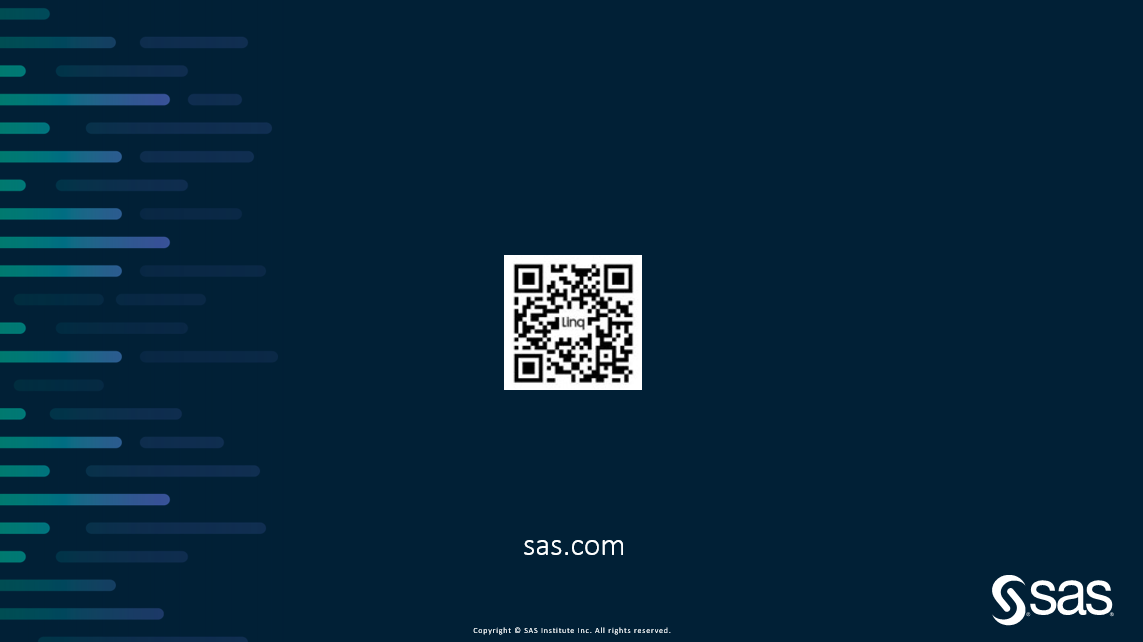